In [14]:
import climetlab as cml
import cems_flood_viewer as cmw
import matplotlib.pyplot as plt

In [15]:
nwse = [50.972204,5.450796, 46.296530, 11.871059] # Ryne

In [16]:
forecast = cml.load_dataset(
            'cems-flood-glofas-seasonal',
            model='lisflood',
            system_version='operational',
            period= '20220101',#'2001-200401-04*',
            leadtime = '24-3600',
            variable="river_discharge_in_the_last_24_hours",
            area= nwse
        )

By downloading data from this dataset, you agree to the terms and conditions defined at https://github.com/ecmwf-lab/climetlab_cems_flood/LICENSEIf you do not agree with such terms, do not download the data. 


2022-03-19 08:48:08,054 INFO Welcome to the CDS
2022-03-19 08:48:08,055 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/cems-glofas-seasonal
2022-03-19 08:48:08,161 INFO Request is completed
2022-03-19 08:48:08,163 INFO Downloading https://download-0010.copernicus-climate.eu/cache-compute-0010/cache/data7/adaptor.mars.external-1647677700.8631642-13731-5-c8f5fee1-066c-41af-821e-d6ee76e313ef.grib to /home/iff/climet-cache/c-dsretriever-7a1cdab92f8f9859963ddcf92cea6ad1ee9564228c475d6e06de501633a8b986.grib.tmp (70M)
2022-03-19 08:48:32,156 INFO Download rate 2.9M/s                                                         


In [17]:
ds = forecast.to_xarray()
ds

<xarray.Dataset>
Dimensions:                  (realization: 51, forecast_reference_time: 1,
                              leadtime: 150, lat: 47, lon: 66)
Coordinates:
  * realization              (realization) int64 0 1 2 3 4 5 ... 46 47 48 49 50
  * forecast_reference_time  (forecast_reference_time) datetime64[ns] 2022-01-01
  * leadtime                 (leadtime) timedelta64[ns] 1 days ... 150 days
  * lat                      (lat) float64 46.36 46.46 46.56 ... 50.86 50.96
  * lon                      (lon) float64 5.451 5.551 5.651 ... 11.85 11.95
    time                     (forecast_reference_time, leadtime) datetime64[ns] dask.array<chunksize=(1, 150), meta=np.ndarray>
Data variables:
    dis24                    (realization, forecast_reference_time, leadtime, lat, lon) float32 dask.array<chunksize=(51, 1, 150, 47, 66), meta=np.ndarray>
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2022-03-19T08:49 GRIB to CDM+CF via cfgrib-0.9.1...

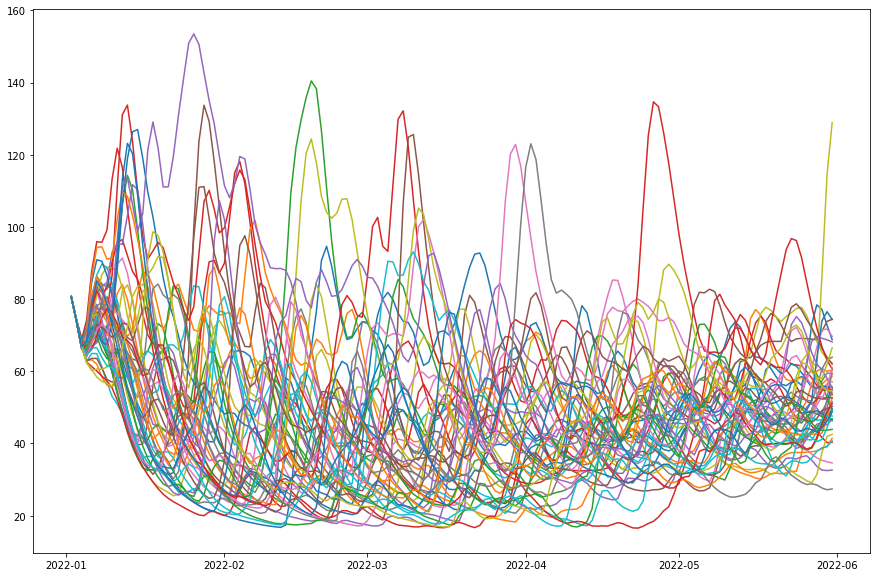

In [30]:
plt.figure(figsize=(15,10))
_ = plt.plot(ds.dis24.isel(forecast_reference_time=0).time.values, ds.dis24.isel(forecast_reference_time=0,drop=True).mean(["lat","lon"]).values.T)

(150, 51)